In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [2]:
# Creating the inputer and Target sets
X = torch.tensor([[1], [2], [3], [4]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8]], dtype=torch.float32)

Text(0.5, 1.0, 'Scatter Plot')

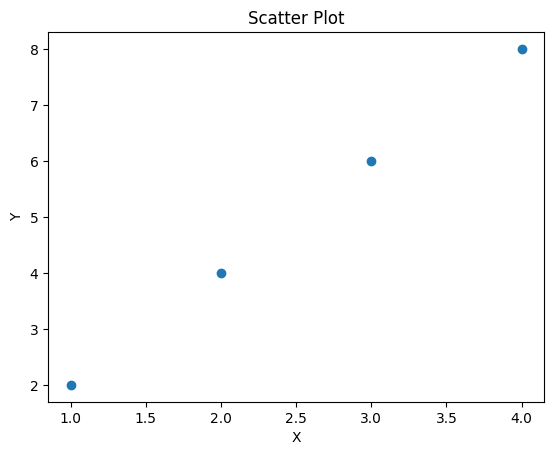

In [3]:
# Create scatter plot
plt.scatter(X, Y)

# Set labels and title
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatter Plot')

# The data is linear

In [4]:
n_samples, n_features = X.shape

In [5]:
print(f'Number of Samples: {n_samples}, Number of Features: {n_features}')

Number of Samples: 4, Number of Features: 1


In [6]:
# Setting an input or testing value
X_test = torch.tensor([5], dtype=torch.float32)

In [7]:
input_size = n_features
output_size = n_features

In [8]:
# we can call this model with samples X
model1 = nn.Linear(input_size, output_size)

In [9]:
print(f'Prediction before training: f(5) = {model1(X_test).item():.3f}')

Prediction before training: f(5) = 4.908


In [84]:
# Assigning the learning rate (alpoha) and the number of iterations
learning_rate = 0.01
n_iters = 15

In [85]:
# Defining the loss function & optimizer
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model1.parameters(), lr=learning_rate)

# Training Model

In [88]:
for epoch in range(n_iters):
    # prediction using forward pass with our model
    y_predicted = model1(X)

    # loss calculation
    l = loss(Y, y_predicted)

    # calculate gradients using backward pass
    l.backward()

    # updating weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 2 == 0:
        [w, b] = model1.parameters() # unpacking parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction using Model 1: {model1(X_test).item():.3f}')

epoch  1 : w =  2.0000734329223633  loss =  tensor(8.0195e-09, grad_fn=<MseLossBackward0>)
epoch  3 : w =  2.0000734329223633  loss =  tensor(7.9012e-09, grad_fn=<MseLossBackward0>)
epoch  5 : w =  2.000072956085205  loss =  tensor(7.8271e-09, grad_fn=<MseLossBackward0>)
epoch  7 : w =  2.000072479248047  loss =  tensor(7.7152e-09, grad_fn=<MseLossBackward0>)
epoch  9 : w =  2.0000720024108887  loss =  tensor(7.6380e-09, grad_fn=<MseLossBackward0>)
epoch  11 : w =  2.0000715255737305  loss =  tensor(7.5275e-09, grad_fn=<MseLossBackward0>)
epoch  13 : w =  2.0000710487365723  loss =  tensor(7.4601e-09, grad_fn=<MseLossBackward0>)
epoch  15 : w =  2.000070571899414  loss =  tensor(7.3509e-09, grad_fn=<MseLossBackward0>)
Prediction using Model 1: 10.000


### Manually Creating the Linear Regression Class

In [62]:
class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define diferent layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)

model2 = LinearRegression(input_size, output_size)

In [78]:
# Assigning the learning rate (alpoha) and the number of iterations
learning_rate = 0.05
n_iters = 175

In [79]:
# Defining the loss function & optimizer
loss = nn.MSELoss()
optimizer = torch.optim.SGD(model2.parameters(), lr=learning_rate)

#### Training model2

In [80]:
for epoch in range(n_iters):
    # predict using forward pass with our model
    y_predicted = model2(X)

    # loss calculation
    l = loss(Y, y_predicted)

    # calculate gradients using backward pass
    l.backward()

    # updating the weights
    optimizer.step()

    # zero the gradients after updating
    optimizer.zero_grad()

    if epoch % 15 == 0:
        [w, b] = model2.parameters() # unpacking parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l)

print(f'Prediction using Model 2: {model2(X_test).item():.3f}')

epoch  1 : w =  1.999446153640747  loss =  tensor(4.5631e-07, grad_fn=<MseLossBackward0>)
epoch  16 : w =  1.9995583295822144  loss =  tensor(2.9021e-07, grad_fn=<MseLossBackward0>)
epoch  31 : w =  1.9996477365493774  loss =  tensor(1.8463e-07, grad_fn=<MseLossBackward0>)
epoch  46 : w =  1.9997190237045288  loss =  tensor(1.1742e-07, grad_fn=<MseLossBackward0>)
epoch  61 : w =  1.999776005744934  loss =  tensor(7.4700e-08, grad_fn=<MseLossBackward0>)
epoch  76 : w =  1.999821424484253  loss =  tensor(4.7507e-08, grad_fn=<MseLossBackward0>)
epoch  91 : w =  1.9998575448989868  loss =  tensor(3.0179e-08, grad_fn=<MseLossBackward0>)
epoch  106 : w =  1.999886393547058  loss =  tensor(1.9226e-08, grad_fn=<MseLossBackward0>)
epoch  121 : w =  1.9999094009399414  loss =  tensor(1.2232e-08, grad_fn=<MseLossBackward0>)
epoch  136 : w =  1.9999277591705322  loss =  tensor(7.7749e-09, grad_fn=<MseLossBackward0>)
epoch  151 : w =  1.999942421913147  loss =  tensor(4.9334e-09, grad_fn=<MseLossBa

In [81]:
# Setting a new input or testing value
XX_test = torch.tensor([6], dtype=torch.float32)

In [87]:
# Checking both models changing the input/test value
print(f'Prediction using Model 1: {model1(XX_test).item():.3f}')
print(f'Prediction using Model 2: {model2(XX_test).item():.3f}')

Prediction using Model 1: 12.000
Prediction using Model 2: 12.000
